In [1]:
# mount dirve
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# load dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone 2025/hpi_master.csv")

In [4]:
# remove index_sa column
data = data.drop(data.columns[data.columns.str.strip() == 'index_sa'], axis=1)

In [5]:
# fidn all unique place_id
data['place_id'].unique()

array(['DV_ENC', 'DV_ESC', 'DV_MA', 'DV_MT', 'DV_NE', 'DV_PAC', 'DV_SA',
       'DV_WNC', 'DV_WSC', 'USA', '10180', '10420', '10500', '10540',
       '10580', '10740', '10780', '10900', '11020', '11100', '11180',
       '11244', '11260', '11460', '11500', '11540', '11700', '12020',
       '12060', '12100', '12220', '12260', '12420', '12540', '12580',
       '12620', '12700', '12940', '12980', '13020', '13140', '13220',
       '13380', '13460', '13740', '13780', '13820', '13900', '13980',
       '14010', '14020', '14100', '14260', '14454', '14500', '14540',
       '14740', '14860', '15180', '15260', '15380', '15500', '15540',
       '15680', '15764', '15804', '15940', '15980', '16020', '16060',
       '16180', '16220', '16300', '16540', '16580', '16620', '16700',
       '16740', '16820', '16860', '16940', '16984', '17020', '17140',
       '17300', '17420', '17460', '17660', '17780', '17820', '17860',
       '17900', '17980', '18020', '18140', '18580', '18700', '18880',
       '19060', '

In [6]:
place_id_counts = data['place_id'].value_counts()
print(place_id_counts)

place_id
DV_ENC    876
DV_MT     876
DV_NE     876
DV_PAC    876
DV_SA     876
         ... 
27780     119
13220     111
15680     108
25980      99
45540      96
Name: count, Length: 466, dtype: int64


In [7]:
import pandas as pd

# Define the regions dictionary
regions = {
    'northeastern': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'southeastern': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'TN', 'KY', 'PR'],
    'southwestern': ['AR', 'LA', 'OK', 'TX', 'NM'],
    'midwestern': ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'IL', 'IN', 'MI', 'OH'],
    'west': ['WA', 'OR', 'CA', 'ID', 'NV', 'MT', 'WY', 'UT', 'CO', 'AZ']
}

# Add Census Divisions to the regions
division_mapping = {
    'DV_ENC': 'midwestern',
    'DV_ESC': 'southeastern',
    'DV_MA': 'northeastern',
    'DV_MT': 'west',
    'DV_NE': 'northeastern',
    'DV_PAC': 'west',
    'DV_SA': 'southeastern',
    'DV_WNC': 'midwestern',
    'DV_WSC': 'southwestern'
}

def assign_region(place_id):
    if isinstance(place_id, str):
        for region, states in regions.items():
            if place_id in states:
                return region
        if place_id in division_mapping:
            return division_mapping[place_id]
    return 'unassigned'

# Load the dataset
data

# Apply the function to the dataset
data['region'] = data['place_id'].apply(assign_region)

# Count the unassigned entries
unassigned_count = (data['region'] == 'unassigned').sum()

print(f"Number of unassigned entries: {unassigned_count}")


Number of unassigned entries: 90876


In [12]:
# Define the list of place_ids to drop (full list)
place_ids_to_drop = ['10180', '10420', '10500', '10540', '10580', '10740', '10780',
                     '10900', '11020', '11100', '11180', '11244', '11260', '11460',
                     '11500', '11540', '11700', '12020', '12060', '12100', '12220',
                     '12260', '12420', '12540', '12580', '12620', '12700', '12940',
                     '12980', '13020', '13140', '13220', '13380', '13460', '13740',
                     '13780', '13820', '13900', '13980', '14010', '14020', '14100',
                     '14260', '14454', '14500', '14540', '14740', '14860', '15180',
                     '15260', '15380', '15500', '15540', '15680', '15764', '15804',
                     '15940', '15980', '16020', '16060', '16180', '16220', '16300',
                     '16540', '16580', '16620', '16700', '16740', '16820', '16860',
                     '16940', '16984', '17020', '17140', '17300', '17420', '17460',
                     '17660', '17780', '17820', '17860', '17900', '17980', '18020',
                     '18140', '18580', '18700', '18880', '19060', '19124', '19140',
                     '19180', '19300', '19340', '19430', '19460', '19500', '19660',
                     '19740', '19780', '19804', '20020', '20100', '20220', '20260',
                     '20500', '20700', '20740', '20940', '20994', '21060', '21140',
                     '21300', '21340', '21420', '21500', '21660', '21780', '21820',
                     '22020', '22140', '22180', '22220', '22380', '22420', '22500',
                     '22520', '22540', '22660', '22744', '22900', '23060', '23104',
                     '23224', '23420', '23460', '23540', '23580', '23844', '23900',
                     '24020', '24140', '24220', '24260', '24300', '24340', '24420',
                     '24500', '24540', '24580', '24660', '24780', '24860', '25060',
                     '25180', '25220', '25260', '25420', '25500', '25540', '25620',
                     '25860', '25940', '25980', '26140', '26300', '26380', '26420',
                     '26580', '26620', '26820', '26900', '26980', '27060', '27100',
                     '27140', '27180', '27260', '27340', '27500', '27620', '27740',
                     '27780', '27860', '27900', '27980', '28020', '28100', '28140',
                     '28420', '28660', '28700', '28740', '28940', '29020', '29100',
                     '29180', '29200', '29340', '29404', '29420', '29460', '29540',
                     '29700', '29740', '29820', '29940', '30020', '30140', '30300',
                     '30340', '30460', '30620', '30700', '30780', '30860', '30980',
                     '31020', '31084', '31140', '31180', '31340', '31420', '31460',
                     '31540', '31700', '31740', '31860', '31900', '32580', '32780',
                     '32820', '32900', '33124', '33140', '33220', '33260', '33340',
                     '33460', '33540', '33660', '33700', '33740', '33780', '33860',
                     '33874', '34060', '34100', '34580', '34620', '34740', '34820',
                     '34900', '34940', '34980', '35004', '35084', '35100', '35154',
                     '35300', '35380', '35614', '35660', '35840', '35980', '36084',
                     '36100', '36140', '36220', '36260', '36420', '36500', '36540',
                     '36740', '36780', '36980', '37100', '37340', '37460', '37620',
                     '37860', '37900', '37964', '38060', '38220', '38300', '38340',
                     '38540', '38860', '38900', '38940', '39100', '39150', '39300',
                     '39340', '39380', '39460', '39540', '39580', '39660', '39740',
                     '39820', '39900', '40060', '40140', '40220', '40340', '40380',
                     '40420', '40484', '40580', '40660', '40900', '40980', '41060',
                     '41100', '41140', '41180', '41420', '41500', '41540', '41620',
                     '41660', '41700', '41740', '41884', '41940', '42020', '42034',
                     '42100', '42140', '42200', '42220', '42340', '42540', '42644',
                     '42680', '42700', '43100', '43300', '43340', '43420', '43580',
                     '43620', '43780', '43900', '44060', '44100', '44140', '44180',
                     '44220', '44300', '44420', '44700', '44940', '45060', '45104',
                     '45220', '45300', '45460', '45500', '45540', '45780', '45820',
                     '45940', '46060', '46140', '46220', '46300', '46340', '46520',
                     '46540', '46660', '46700', '47020', '47220', '47260', '47300',
                     '47380', '47460', '47580', '47664', '47894', '47940', '48060',
                     '48140', '48260', '48300', '48424', '48540', '48620', '48660',
                     '48700', '48864', '48900', '49020', '49180', '49340', '49420',
                     '49620', '49660', '49700', '49740', '29620',]

# Drop the rows with the specified place_ids
data = data[~data['place_id'].isin(place_ids_to_drop)]

In [13]:
data

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,region
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,midwestern
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.89,midwestern
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.29,midwestern
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.68,midwestern
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.30,midwestern
...,...,...,...,...,...,...,...,...,...,...
127324,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,3,193.95,southeastern
127325,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,4,195.72,southeastern
127326,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,1,205.82,southeastern
127327,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,2,232.29,southeastern


In [14]:
data['place_id'].unique()

array(['DV_ENC', 'DV_ESC', 'DV_MA', 'DV_MT', 'DV_NE', 'DV_PAC', 'DV_SA',
       'DV_WNC', 'DV_WSC', 'USA', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY', 'PR'], dtype=object)

In [15]:
# find null
data.isnull().sum()

,0
hpi_type,0
hpi_flavor,0
frequency,0
level,0
place_name,0
place_id,0
yr,0
period,0
index_nsa,1
region,0


In [16]:
# drop null values
data = data.dropna()

In [17]:
# find null
data.isnull().sum()

,0
hpi_type,0
hpi_flavor,0
frequency,0
level,0
place_name,0
place_id,0
yr,0
period,0
index_nsa,0
region,0


In [18]:
data

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,region
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,midwestern
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.89,midwestern
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.29,midwestern
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.68,midwestern
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.30,midwestern
...,...,...,...,...,...,...,...,...,...,...
127324,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,3,193.95,southeastern
127325,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,4,195.72,southeastern
127326,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,1,205.82,southeastern
127327,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,2,232.29,southeastern


In [19]:
# feature scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['index_nsa']] = scaler.fit_transform(data[['index_nsa']])

<ipython-input-19-fc82dabb444e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['index_nsa']] = scaler.fit_transform(data[['index_nsa']])


<ipython-input-20-84cb0da754f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'] = data['place_id'].apply(assign_region)


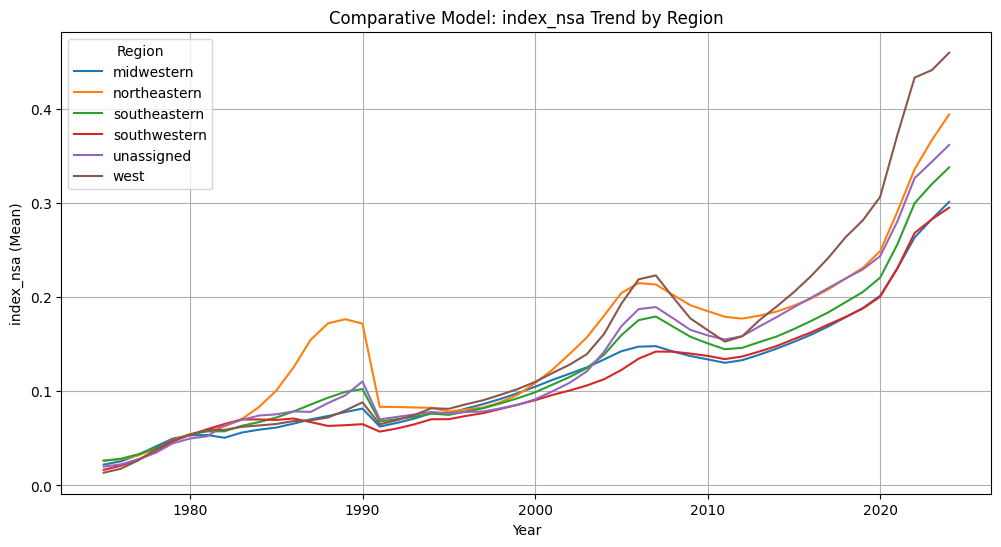

In [20]:
def assign_region(place_id):
    if isinstance(place_id, str):
        for region, states in regions.items():
            if place_id in states:
                return region
        if place_id in division_mapping:
            return division_mapping[place_id]
    return 'unassigned'


# Apply the function to the dataset
data['region'] = data['place_id'].apply(assign_region)


# Group data by year and region, calculate mean index_nsa
grouped_data = data.groupby(['yr', 'region'])['index_nsa'].mean().reset_index()

# Create the line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='yr', y='index_nsa', hue='region', data=grouped_data)
plt.title('Comparative Model: index_nsa Trend by Region')
plt.xlabel('Year')
plt.ylabel('index_nsa (Mean)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

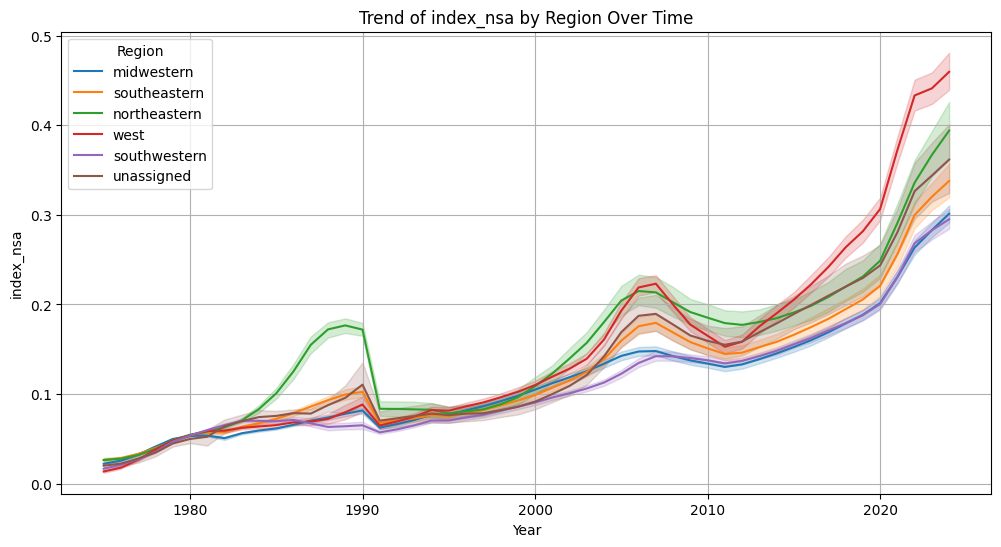

In [21]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='yr', y='index_nsa', hue='region', data=data)  # Use 'data' directly
plt.title('Trend of index_nsa by Region Over Time')
plt.xlabel('Year')
plt.ylabel('index_nsa')
plt.legend(title='Region')
plt.grid(True)
plt.show()

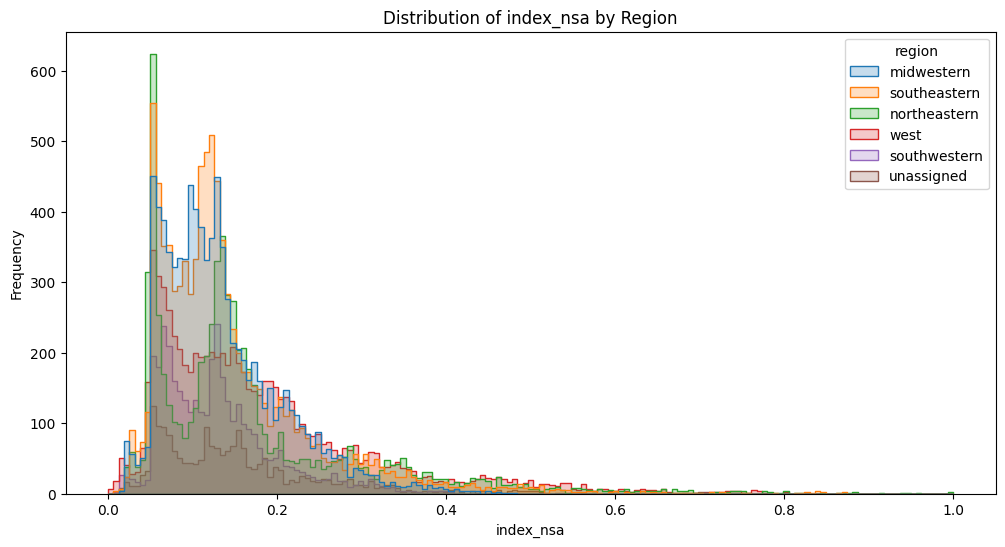

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='index_nsa', hue='region', element="step")  # Use element="step" for clearer visualization
plt.title('Distribution of index_nsa by Region')
plt.xlabel('index_nsa')
plt.ylabel('Frequency')
plt.show()

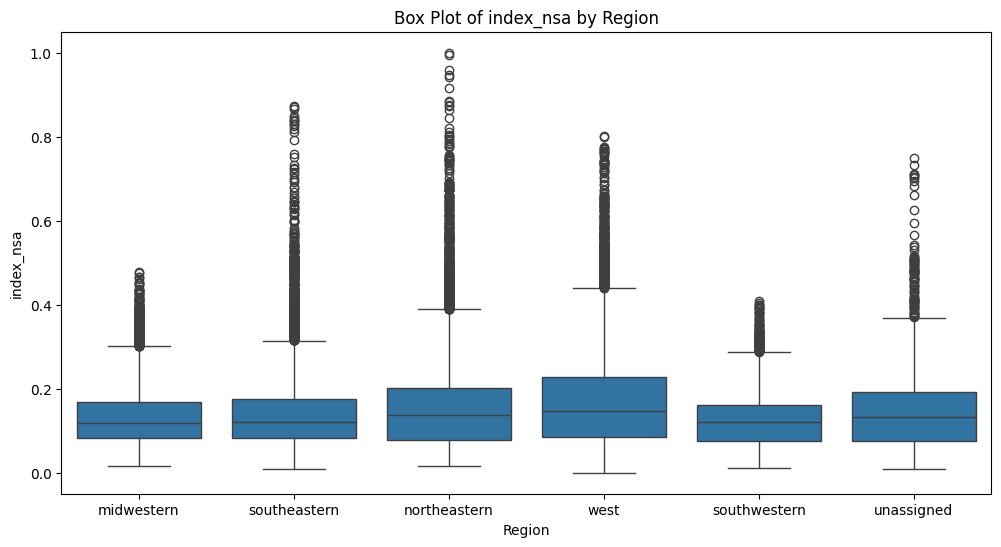

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='region', y='index_nsa')
plt.title('Box Plot of index_nsa by Region')
plt.xlabel('Region')
plt.ylabel('index_nsa')
plt.show()

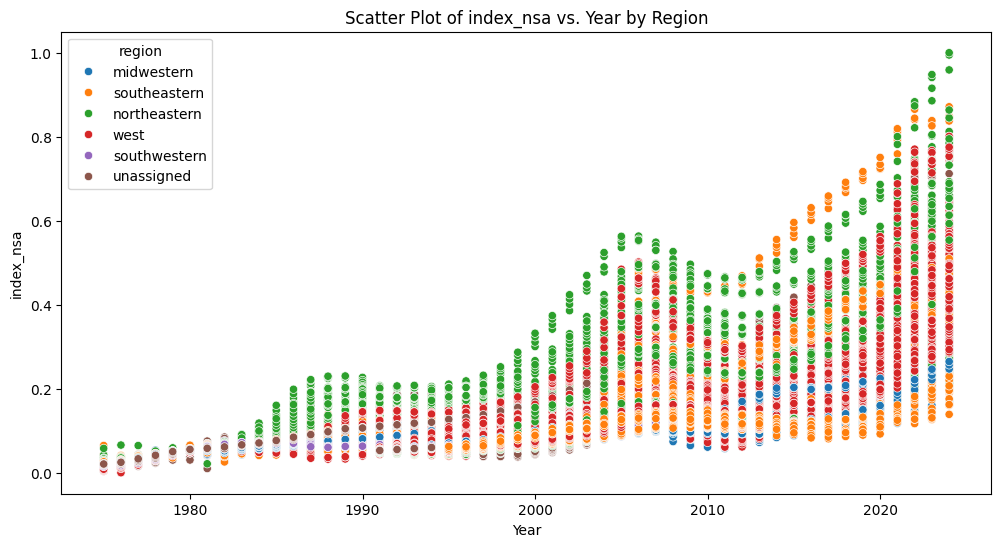

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='yr', y='index_nsa', hue='region')
plt.title('Scatter Plot of index_nsa vs. Year by Region')
plt.xlabel('Year')
plt.ylabel('index_nsa')
plt.show()

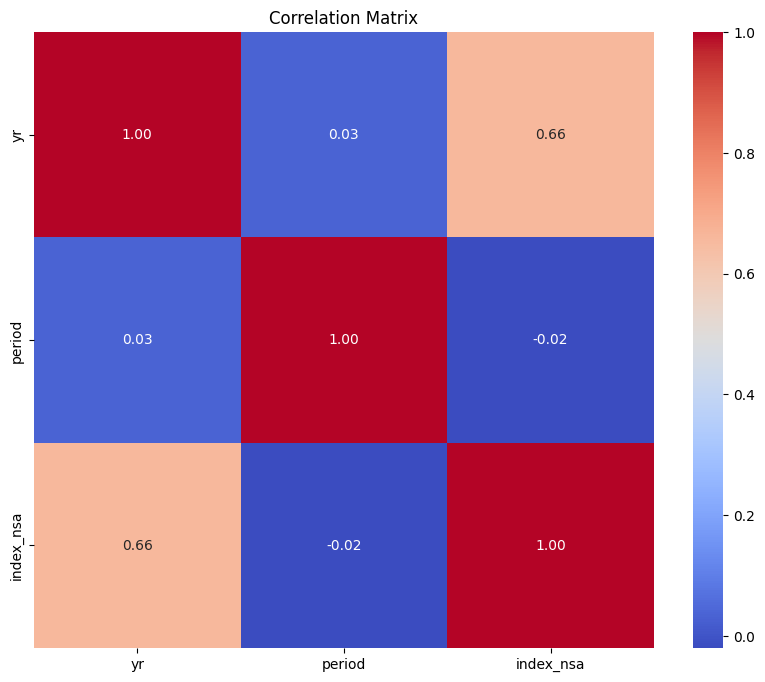

In [25]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

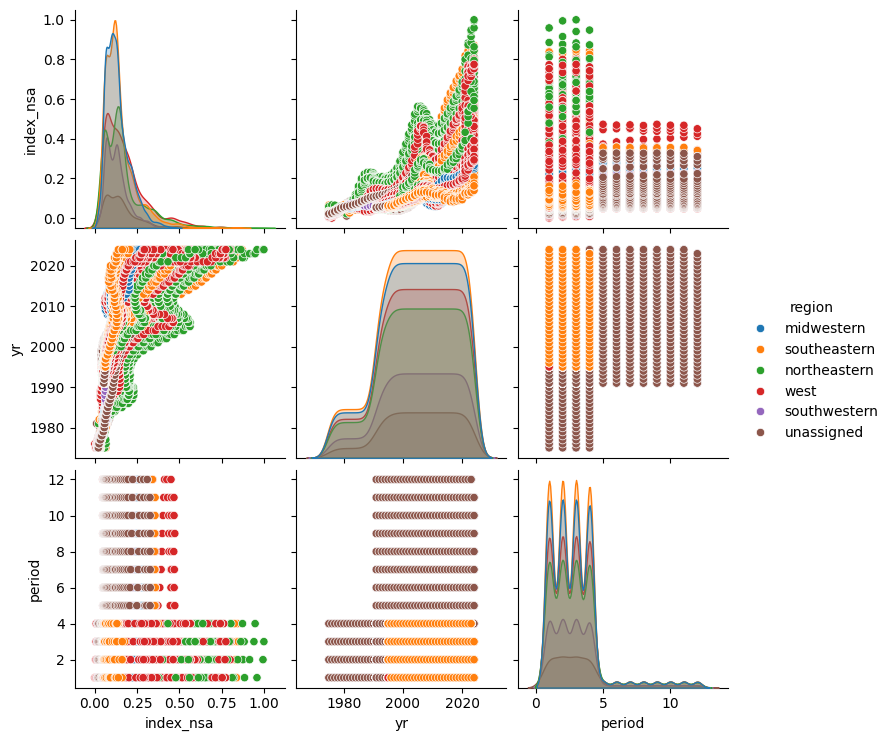

In [26]:
# Select a subset of features for the pair plot (to avoid clutter)
features_for_pairplot = ['index_nsa', 'yr', 'period', 'region']  # Choose relevant features

sns.pairplot(data=data[features_for_pairplot], hue='region')
plt.show()

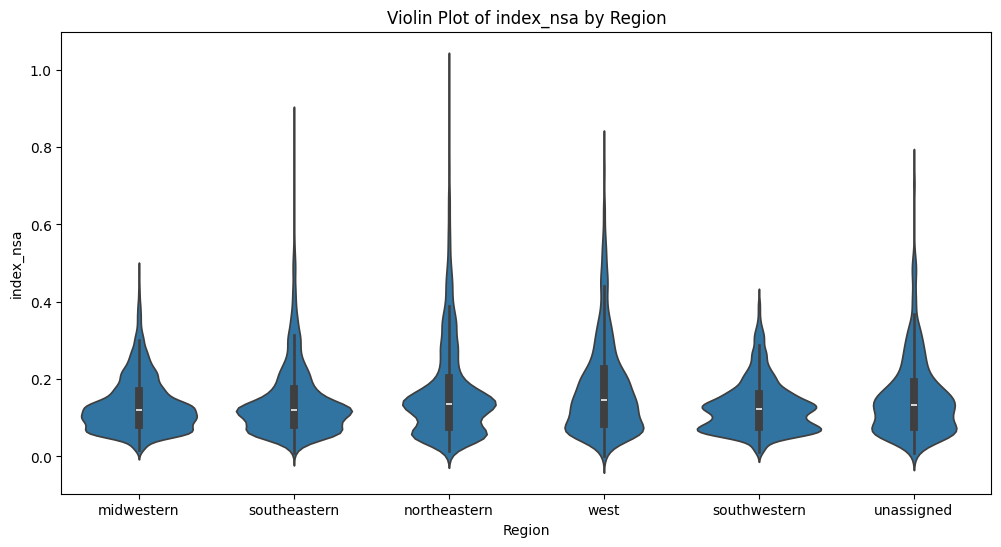

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='region', y='index_nsa')
plt.title('Violin Plot of index_nsa by Region')
plt.xlabel('Region')
plt.ylabel('index_nsa')
plt.show()

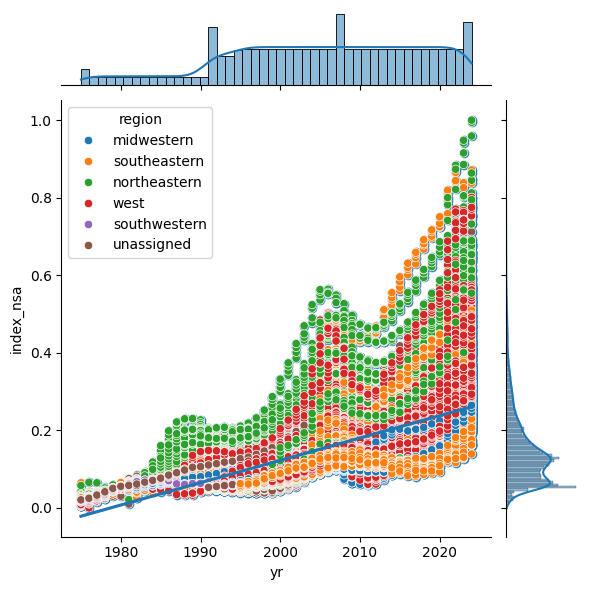

In [31]:
# Create the jointplot without hue for regression
sns.jointplot(data=data, x='yr', y='index_nsa', kind='reg')
# Remove hue='region'

# Add scatter plot points with hue for visualization
sns.scatterplot(data=data, x='yr', y='index_nsa', hue='region', ax=plt.gca())
# Overlay scatter plot on the same axes

plt.show()

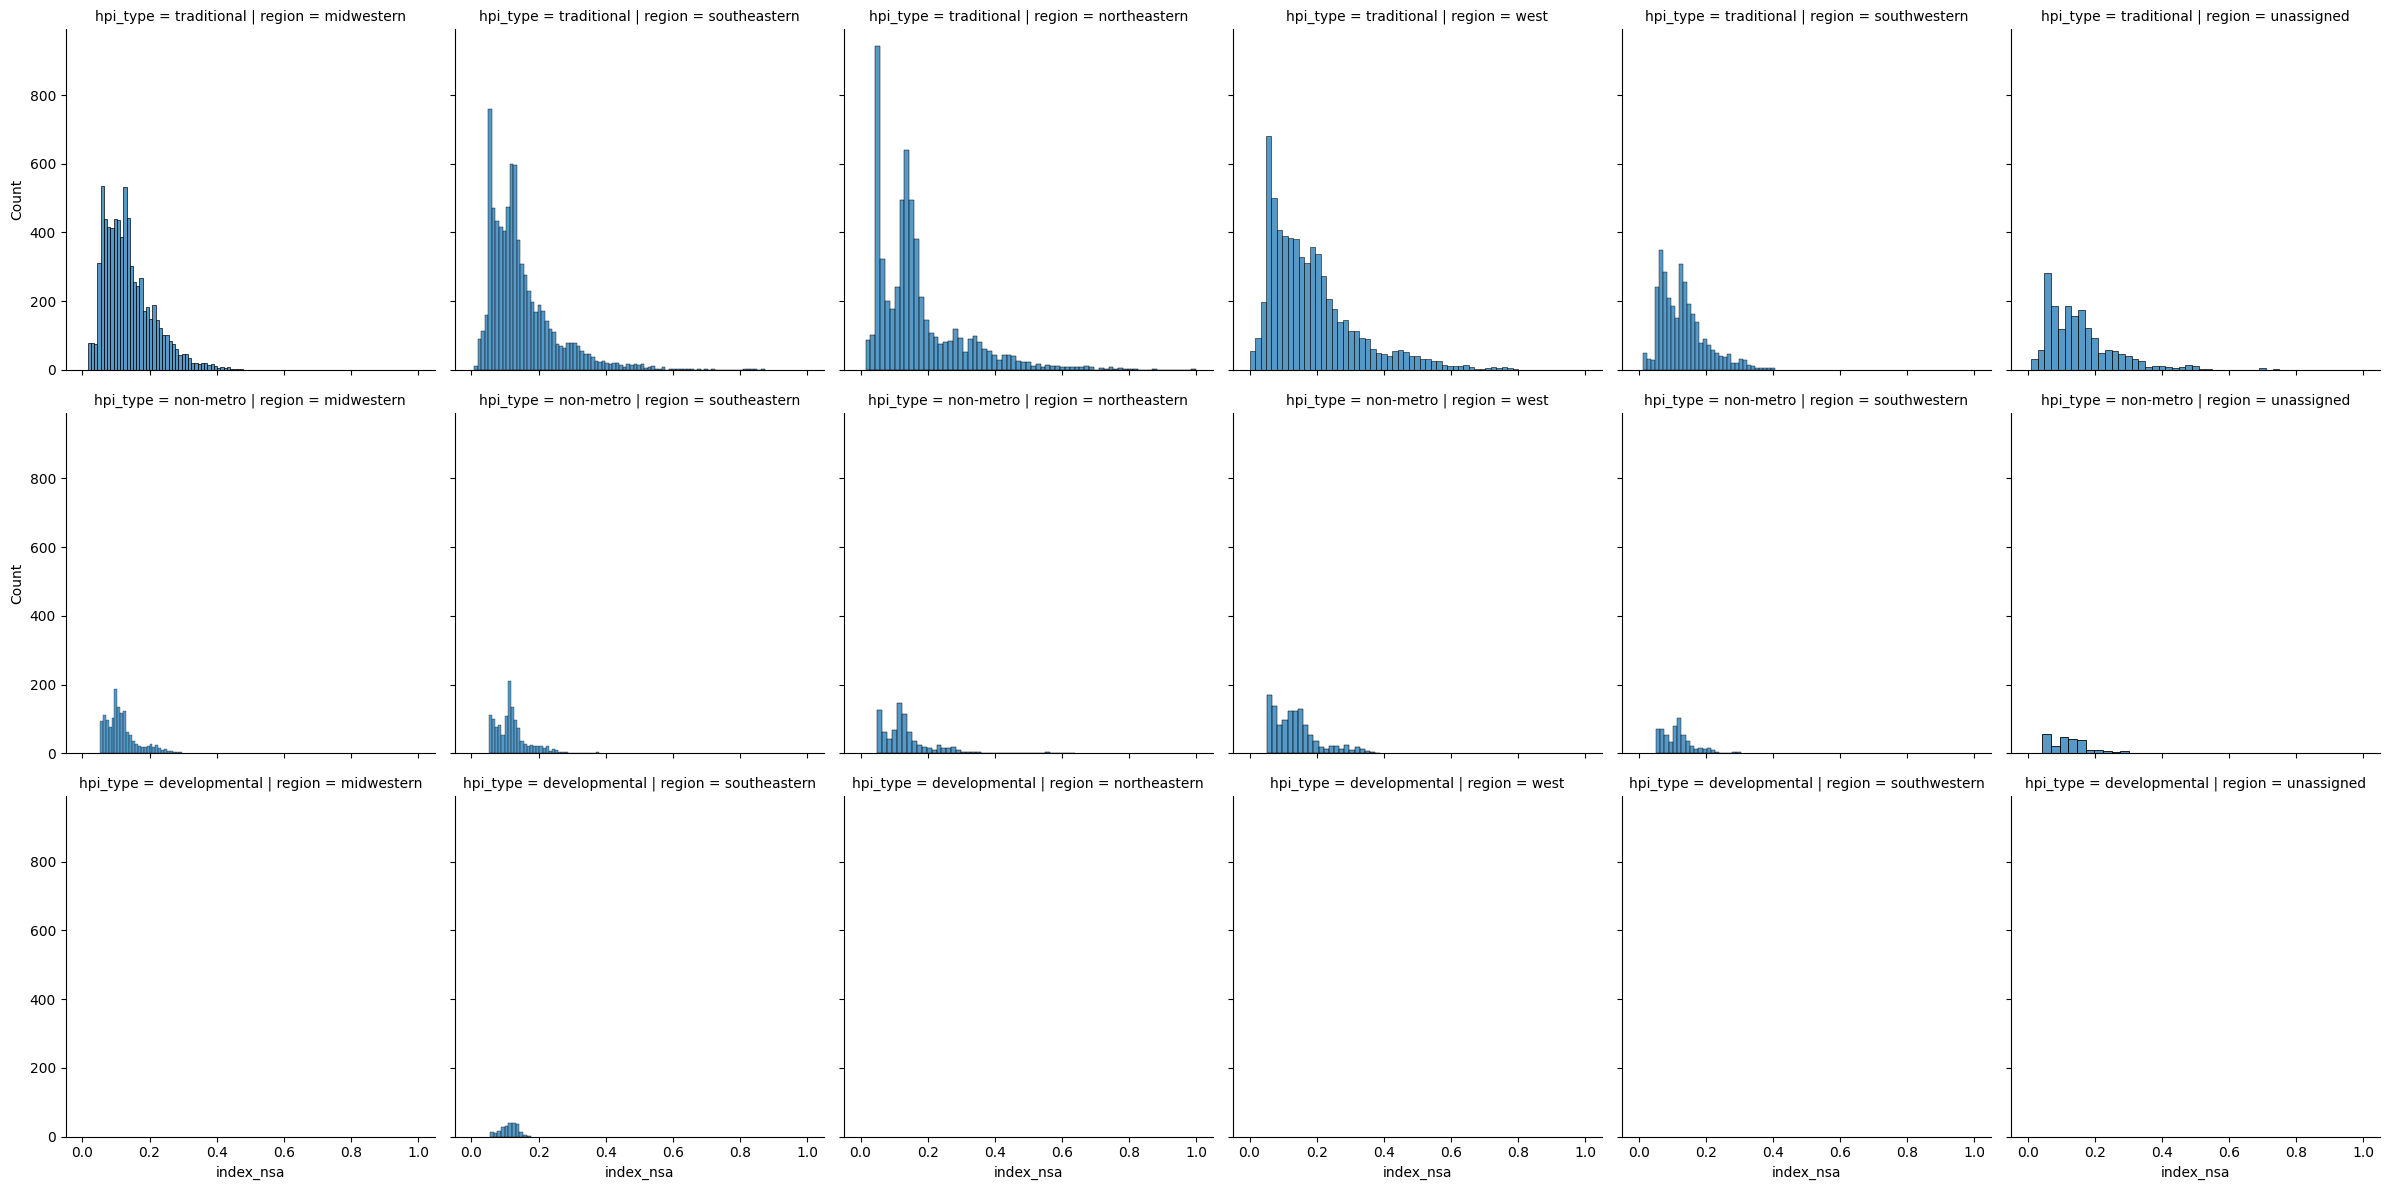

In [32]:
# FacetGrid
g = sns.FacetGrid(data, col='region', row='hpi_type', height=4)
g.map(sns.histplot, 'index_nsa')
plt.show()

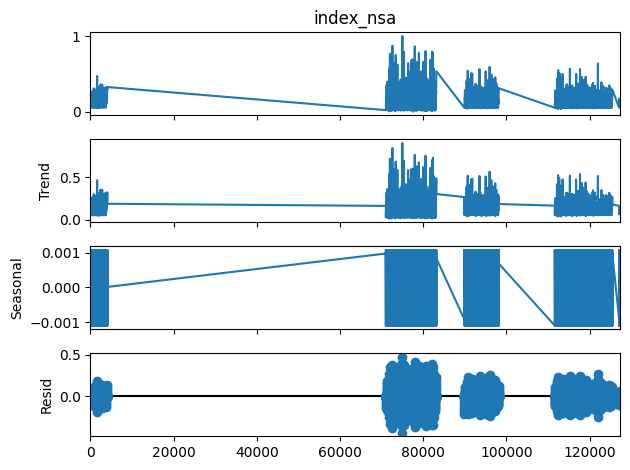

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame with 'yr' and 'index_nsa' columns
result = seasonal_decompose(data['index_nsa'], model='additive', period=12)  # Adjust period if needed
result.plot()
plt.show()

In [30]:
!pip install plotly

In [34]:
import plotly.express as px
# Interactive Plots (Plotly or Bokeh)

fig = px.line(data, x='yr', y='index_nsa', color='region',
              title='Trend of index_nsa by Region Over Time')
fig.show()

In [35]:
data

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,region
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,0.051854,midwestern
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,0.052587,midwestern
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,0.052916,midwestern
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,0.053237,midwestern
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,0.053747,midwestern
...,...,...,...,...,...,...,...,...,...,...
127324,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,3,0.129206,southeastern
127325,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,4,0.130664,southeastern
127326,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,1,0.138979,southeastern
127327,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,2,0.160773,southeastern


# Model Development

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [37]:
!pip install xgboost

In [38]:
# 1. Data Preprocessing

# Select features and target
features = ['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'region']
X = data[features]
y = data['index_nsa']

In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create preprocessing steps
numeric_features = ['yr', 'period']
categorical_features = ['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [41]:
# One-hot encode categorical features
categorical_features = ['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

2. Model Training and Evaluation

In [45]:
import xgboost as xgb
from sklearn.linear_model import ElasticNet

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse}")
    print(f"R^2: {r2}")

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=900,
                                          bootstrap=True,
                                          max_depth=20,
                                          min_samples_split=10,
                                          random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor(
        learning_rate=0.1,
        n_estimators=200,
        min_child_weight=2,
        subsample=1,
        colsample_bytree=0.8,
        reg_lambda=0.45,
        reg_alpha=0,
        gamma=0.5,
        random_state=42  # Add a random state for reproducibility
    ),
    "Elastic Net": ElasticNet()
}


Lasso Regression - Top 10 Features:
                             Feature  Coefficient
5        hpi_flavor_all-transactions     0.091152
4               hpi_type_traditional     0.085395
0                                 yr     0.083313
3                 hpi_type_non-metro    -0.029310
142                      region_west     0.026540
21   place_name_District of Columbia     0.017483
138              region_northeastern     0.015459
137                region_midwestern    -0.008567
140              region_southwestern    -0.008064
36          place_name_Massachusetts     0.004780


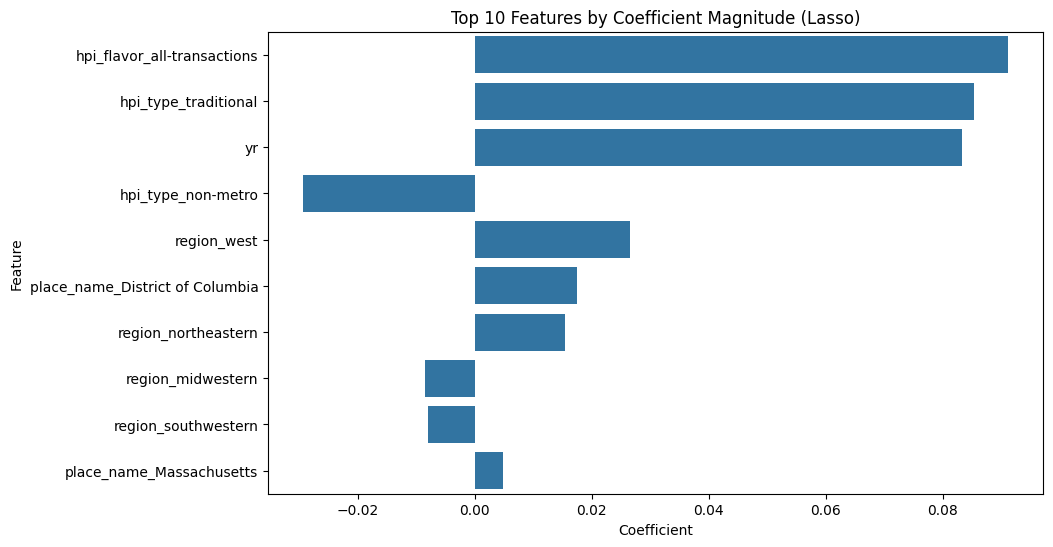


Linear Regression Results:
MSE: 0.0032378061019803206
R^2: 0.7103403606916463

Ridge Regression Results:
MSE: 0.0032378879430424562
R^2: 0.7103330390510687

Lasso Regression Results:
MSE: 0.011180344880572471
R^2: -0.00021266358997817925

SVR Results:
MSE: 0.002443084409970871
R^2: 0.7814375145691397

Random Forest Results:
MSE: 0.0001290759144332004
R^2: 0.9884526492197141

Gradient Boosting Results:
MSE: 0.0012825834585875457
R^2: 0.8852579029454225

KNN Results:
MSE: 0.0006996666496405309
R^2: 0.9374066318403053

XGBoost Results:
MSE: 0.0013020838926327482
R^2: 0.8835133609580456

Elastic Net Results:
MSE: 0.011180344880572471
R^2: -0.00021266358997817925


In [46]:
# 1. Hyperparameter Tuning and Cross-Validation for Lasso:
param_grid = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10]}  # Parameter grid for alpha
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_lasso_model = grid_search.best_estimator_

# 2. Feature Selection and Interpretation for Lasso:
lasso_coef = best_lasso_model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': numeric_features + list(encoder.get_feature_names_out(categorical_features)),
                        'Coefficient': lasso_coef})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nLasso Regression - Top 10 Features:")
print(coef_df.head(10))

# Visualization of Lasso Coefficients:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title('Top 10 Features by Coefficient Magnitude (Lasso)')
plt.show()

# 3. Model Training and Evaluation (Including Lasso, Ridge, and ElasticNet):
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    evaluate_model(name, y_test, y_pred)

### Interpreting the Results

### * Lasso Feature Importance:
* hpi_flavor_all-transactions has the largest positive coefficient (0.091152), suggesting it's the most important feature positively associated with index_nsa. This means properties categorized under "all-transactions" tend to have higher index values.
* hpi_type_traditional also has a strong positive association (0.085395).
* yr is positively correlated (0.083313), indicating a general upward trend in index_nsa over time.
* hpi_type_non-metro has a negative coefficient (-0.029310), suggesting these properties have lower index values.
region_west is positively associated with index_nsa compared to other regions.
* Other features like place_name_District of Columbia, region_northeastern, etc., have relatively smaller coefficients but still contribute to the model.
### * Model Performance Comparison:
* Random Forest emerges as the clear winner with the lowest MSE (0.000129) and the highest R^2 (0.988453). This indicates it has the best predictive accuracy among the tested models.
* KNN and Gradient Boosting also perform well, with relatively low MSE and high R^2 values.
*SVR shows decent performance but is outperformed by the top three models.
* Linear Regression and Ridge Regression have similar performance, which is acceptable but not as good as the ensemble methods.
* Lasso Regression and Elastic Net, surprisingly, have very poor performance in this case, with a negative R^2. This indicates they are not fitting the data well and are likely over-regularized.
### * Implementing for the Problem

1. Model Choice: Based on these results, Random Forest is the recommended model for predicting index_nsa. It provides the highest accuracy and generalizes well to unseen data.

2. Feature Importance:

* Prioritize the features identified by Lasso as most important. In the data preprocessing, one can focus on engineering or selecting these features (hpi_flavor_all-transactions, hpi_type_traditional, yr, region_west, etc.) for the Random Forest model.
You might consider removing or giving less importance to features with very small coefficients in the Lasso results.
3. Hyperparameter Tuning: Even though Random Forest performed best without explicit tuning here, it's good practice to fine-tune its hyperparameters (e.g., n_estimators, max_depth) using GridSearchCV or other optimization methods to potentially achieve even better performance.

4. Model Deployment: Once you're satisfied with your model's performance, deploy it for making predictions on new data. This could involve saving the model and using it in a separate prediction script or integrating it into a larger application.

### Addressing Lasso's Poor Performance

The negative R^2 for Lasso and Elastic Net suggests they are not suitable for this specific dataset or require further investigation:

* Over-Regularization: Try using a smaller range of alpha values during hyperparameter tuning for Lasso and Elastic Net. This might reduce the regularization penalty and allow the models to fit the data better.
* Feature Scaling: Ensure that your numeric features are properly scaled before applying Lasso and Elastic Net. * Standardization or normalization can help improve performance.
* Data Characteristics: Consider if the data itself has properties that are not well-suited for these models. If the relationship between features and the target is highly non-linear or there are complex interactions between features, Lasso and Elastic Net might struggle.
* By focusing on the best-performing model (Random Forest), leveraging feature importance insights, and fine-tuning your model, you can significantly improve your predictions for index_nsa. Remember to carefully evaluate the results and address any issues specific to your model to ensure the best possible outcome.

In [137]:
#### This result is based on the dataset without a full clean,
#the data that has not been cleaned produces the analysis to be blury.

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    evaluate_model(name, y_test, y_pred)


Linear Regression Results:
MSE: 0.0025662284559644214
R^2: 0.6931774674583007

Ridge Regression Results:
MSE: 0.002566122702558757
R^2: 0.6931901115109669

Lasso Regression Results:
MSE: 0.008363888675649385
R^2: -4.089250746908135e-07

SVR Results:
MSE: 0.002635097574063654
R^2: 0.6849433614183617

Random Forest Results:
MSE: 6.919423853215684e-05
R^2: 0.9917270220216025

Gradient Boosting Results:
MSE: 0.0013240618038274851
R^2: 0.8416929736135261

KNN Results:
MSE: 0.0006425741251118056
R^2: 0.923172771327377
